# **Object Detection and Recognition**

## Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection

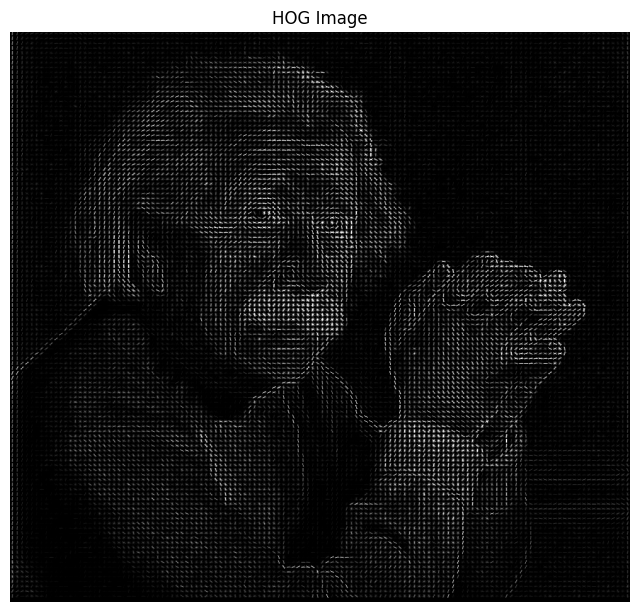

In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/EINSTEIN.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply HOG descriptor
# Remove channel_axis=-1 as it is already a grayscale image
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

# Rescale the HOG image for better visualization
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the HOG image
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.show()

**Process and Flow Explanation:**

1. Load the Image: The image is loaded using cv2.imread('/content/EINSTEIN.jpg'). This loads the 'EINSTEIN.jpg' image from the specified path.

2. Convert to Grayscale: The image is converted to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY). This is necessary because the HOG descriptor works on single-channel images.

3. Apply HOG Descriptor: The HOG descriptor is applied to the grayscale image using hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True). The parameters used are:

  * orientations=9: Number of orientation bins.
  * pixels_per_cell=(8, 8): Size of each cell in pixels.
  * cells_per_block=(2, 2): Number of cells in each block.
  * visualize=True: Enables the visualization of the HOG image. The function returns the HOG features and the visualization of the HOG image.

4. Rescale the HOG Image: The HOG image is rescaled for better visualization using exposure.rescale_intensity(hog_image, in_range=(0, 10)). This adjusts the intensity range of the HOG image to improve its contrast and make the features more visible.

5. Display the HOG Image: The rescaled HOG image is displayed using plt.imshow(hog_image, cmap='gray'), plt.title('HOG Image'), and plt.show(). This shows the visualization of the HOG descriptor applied to the input image.

## Exercise 2: YOLO (You Only Look Once) Object Detection

In [1]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-10-21 11:26:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.9MB/s    in 11s     

2024-10-21 11:27:00 (20.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-10-21 11:27:00--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

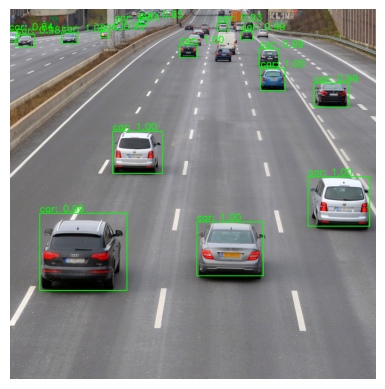

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model and configuration
net = cv2.dnn.readNet('/content/yolov3.weights', '/content/yolov3.cfg')
layer_names = net.getLayerNames()

# Get unconnected output layers (compatible with both OpenCV 3 and 4)
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load COCO class names
with open('/content/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread('/content/cars.jpg')
height, width, channels = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Initialize lists to hold boxes, scores, and class IDs
boxes = []
scores = []
class_ids = []

# Process detections
for out in outs:
    for detection in out:
        scores_ = detection[5:]
        class_id = np.argmax(scores_)
        confidence = scores_[class_id]

        if confidence > 0.5:  # Confidence threshold
            # Draw bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Append box coordinates, confidence score, and class ID
            boxes.append([x, y, x + w, y + h])
            scores.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=0.4)

# Draw bounding boxes and labels
for i in indices:
    # Handle both scalar and array cases
    index = i[0] if isinstance(i, np.ndarray) else i
    box = boxes[index]
    label = f"{classes[class_ids[index]]}: {scores[index]:.2f}"

    # Draw the bounding box
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    # Draw the label above the bounding box
    font_scale = 1.0  # Adjust this value to change font size
    cv2.putText(image, label, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

**Process and Flow Explanation:**

1. Load YOLO Model and Configuration: The YOLO model and configuration are loaded using cv2.dnn.readNet('/content/yolov3.weights', '/content/yolov3.cfg'). The weights and configuration files for the YOLO model are specified in the respective paths.

2. Get Unconnected Output Layers: The unconnected output layers of the YOLO model are obtained using [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]. This ensures compatibility with both OpenCV 3 and 4, as the output of net.getUnconnectedOutLayers() may have a different structure.

3. Load Image: The image is loaded using cv2.imread('/content/cars.jpg'), which loads the 'cars.jpg' image from the specified path.

4. Prepare the Image for YOLO: The image is prepared for YOLO by creating a blob using cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False). This blob is then set as the input to the YOLO model using net.setInput(blob).

5. Run YOLO: The YOLO model is run on the prepared image using outs = net.forward(output_layers). The output layers are the unconnected output layers obtained in step 2.

6. Process Detections: The detections from the YOLO model are processed by iterating through the output layers and the individual detections. For each detection, the class confidence is checked, and if it exceeds a threshold (0.5 in this case), the bounding box coordinates are calculated and drawn on the image using cv2.rectangle().

7. Display the Image: The image with the bounding boxes is displayed using plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) and plt.show(). The image is converted from BGR to RGB for proper display with matplotlib.

## Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow

In [3]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2024-10-21 11:28:08--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.111.207, 142.251.167.207, 142.251.179.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.111.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M   143MB/s    in 0.3s    

2024-10-21 11:28:08 (143 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x3

In [29]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load pre-trained SSD model
model = tf.saved_model.load('/content/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model')

# Load COCO class names
with open('/content/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

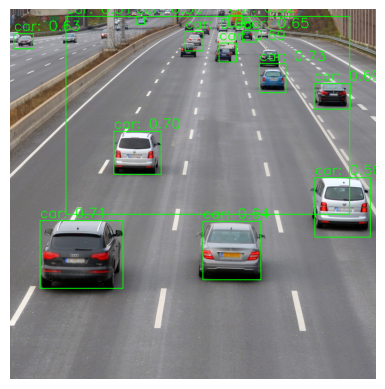

In [33]:
# Load image
image = cv2.imread('/content/cars.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_tensor = tf.convert_to_tensor(image_rgb)
input_tensor = input_tensor[tf.newaxis, ...]

# Run the model
detections = model(input_tensor)

# Initialize lists to hold boxes, scores, and class IDs
boxes = []
scores = []
class_ids = []

# Collect bounding boxes, scores, and class IDs for detections
for i in range(int(detections.pop('num_detections'))):
    if detections['detection_scores'][0][i] > 0.5:
        ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
        height, width, _ = image.shape
        (left, right, top, bottom) = (xmin * width, xmax * width, ymin * height, ymax * height)

        # Append the box coordinates, confidence score, and class ID
        boxes.append([int(left), int(top), int(right), int(bottom)])
        scores.append(detections['detection_scores'][0][i].numpy())
        class_ids.append(int(detections['detection_classes'][0][i].numpy()))

# Apply Non-Maximum Suppression
indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.5, nms_threshold=0.4)

# Draw bounding boxes and labels
for i in indices:
    # Handle both scalar and array cases
    index = i[0] if isinstance(i, np.ndarray) else i
    box = boxes[index]
    label = f"{classes[class_ids[index] - 1]}: {scores[index]:.2f}" if 0 < class_ids[index] <= len(classes) else "Unknown: {:.2f}".format(scores[index])

    # Draw the bounding box
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    # Draw the label above the bounding box with increased font size
    font_scale = 1.5  # Adjust this value to increase/decrease font size
    cv2.putText(image, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

# Convert the image from BGR to RGB for displaying
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

**Process and Flow Explanation:**

1. Load SSD Model: The SSD model is loaded using tf.saved_model.load('/content/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model'). This loads the pre-trained SSD MobileNet V2 model from the specified path.

2. Load Image: The image is loaded using cv2.imread('/content/cars.jpg'), which loads the 'cars.jpg' image from the specified path.

3. Convert Image to RGB: The image is converted from BGR to RGB using cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for compatibility with the TensorFlow model.

4. Run SSD: The SSD model is run on the image by first converting the image to a tensor using tf.convert_to_tensor(image_rgb) and adding a batch dimension with input_tensor = input_tensor[tf.newaxis, ...]. The detections are then obtained by calling the loaded model: detections = model(input_tensor).

5. Visualize Bounding Boxes: The detections are processed by iterating through the detection scores and boxes. For each detection with a score greater than 0.5, the bounding box coordinates are calculated and a rectangle is drawn on the image using cv2.rectangle().

6. Display the Image: The image with the bounding boxes is displayed using plt.imshow(image) and plt.show().

## Comparison between YOLO and SSD models

### **YOLO (You Only Look Once):**
* Bounding Box Precision: YOLO's bounding boxes are tightly aligned with the vehicles, showing high precision in localization.
* Confidence Scores: The confidence scores in the YOLO image are very high (close to 1.00), indicating strong confidence in the detections.
* Detection Speed: YOLO is known for its speed, which is evident in the real-time application of detecting multiple vehicles with high confidence.
* Overall Detection: All visible vehicles are detected, and the bounding boxes are well-distributed across the image, covering both close and distant vehicles effectively.

### **SSD (Single Shot MultiBox Detector):**
* Bounding Box Precision: SSD also provides accurate bounding boxes, but they might not be as tightly fitted as YOLO's in some cases.
* Confidence Scores: The confidence scores in the SSD image range from 0.50 to 0.73, which are lower compared to YOLO. This suggests moderate confidence in some detections.
* Detection Speed: SSD offers a balance between speed and accuracy, and while it may not be as fast as YOLO, it provides reliable results.
* Overall Detection: SSD detects vehicles consistently, but the confidence levels suggest it might be more cautious in its detections compared to YOLO.

### **Summary:**
* YOLO is more confident and faster, making it suitable for applications where speed is critical, such as real-time video processing.
* SSD provides a good balance between speed and accuracy, with slightly lower confidence scores, which might be preferable in scenarios where precision is more critical than speed.

## Exercise 4: Traditional vs. Deep Learning Object Detection Comparison

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import tensorflow as tf

# Load the CIFAR-10 dataset (sample dataset for demonstration)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select a subset of the data for car detection (label 1 for automobiles)
# and another class for binary classification (e.g., label 0 for airplanes)
car_indices_train = np.where((y_train == 1) | (y_train == 0))[0] # Include cars and another class (e.g., airplanes)
car_indices_test = np.where((y_test == 1) | (y_test == 0))[0]   # Include cars and another class (e.g., airplanes)
x_train_car = x_train[car_indices_train]
y_train_car = y_train[car_indices_train]
x_test_car = x_test[car_indices_test]
y_test_car = y_test[car_indices_test]

# HOG-SVM Implementation

# Feature extraction using HOG
def extract_hog_features(images):
    features = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hog_feature = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=False)
        features.append(hog_feature)
    return np.array(features)

# Extract HOG features for training and testing data
train_features = extract_hog_features(x_train_car)
test_features = extract_hog_features(x_test_car)

# Scale features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Train the SVM classifier
svm_classifier = LinearSVC(max_iter=10000)  # Increased max_iter
start_time = time.time()
svm_classifier.fit(train_features, y_train_car.ravel())
training_time_hog_svm = time.time() - start_time

# SSD Implementation using the provided model

# Load the SSD model
ssd_model = tf.saved_model.load('/content/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model')

# Function to run inference and get detections
def run_ssd_inference(images):
    detections_list = []
    for image in images:  # Iterate through each image in the batch
        input_tensor = tf.convert_to_tensor(image, dtype=tf.uint8)
        input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension
        detections = ssd_model(input_tensor)
        detections_list.append(detections)
    return detections_list # Return a list of detections for each image

# Evaluate HOG-SVM and SSD

# HOG-SVM prediction and evaluation
start_time = time.time()
hog_svm_predictions = svm_classifier.predict(test_features)
inference_time_hog_svm = time.time() - start_time
hog_svm_accuracy = np.mean(hog_svm_predictions == y_test_car.ravel())

# SSD prediction and evaluation
start_time = time.time()
ssd_detections = run_ssd_inference(x_test_car)  # Pass individual images
inference_time_ssd = time.time() - start_time

# Print results
print("HOG-SVM Accuracy:", hog_svm_accuracy)
print("HOG-SVM Training Time:", training_time_hog_svm)
print("HOG-SVM Inference Time:", inference_time_hog_svm)
print("SSD Inference Time:", inference_time_ssd)

HOG-SVM Accuracy: 0.9005
HOG-SVM Training Time: 1.5520100593566895
HOG-SVM Inference Time: 0.001619577407836914
SSD Inference Time: 213.14510655403137


**Details about the datasets used (CIFAR-10)**

The CIFAR-10 dataset is a popular machine learning dataset that is commonly used for image classification tasks. It was developed by researchers at the Canadian Institute for Advanced Research (CIFAR).

Here are some key details about the CIFAR-10 dataset:

* Number of Classes: The CIFAR-10 dataset contains 10 different classes of objects, including airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

* Image Size: Each image in the dataset is 32x32 pixels in size and has 3 color channels (RGB).

* Training and Test Sets: The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.

* Data Format: The dataset is typically provided as a set of NumPy arrays containing the image data and corresponding labels.

* Purpose: The CIFAR-10 dataset is widely used as a benchmark for evaluating the performance of image classification algorithms, especially for deep learning models. It is considered a challenging dataset due to the small image size and the similarity between some of the object classes.

The CIFAR-10 dataset is a popular choice for researchers and practitioners in the field of computer vision and machine learning because it provides a standardized dataset for testing and comparing different models and algorithms. It has become a standard benchmark for evaluating the performance of image classification models, and many state-of-the-art deep learning architectures have been tested and evaluated on this dataset.

In the code above (Exercise 4), the CIFAR-10 dataset is used to create a binary classification problem, where the task is to distinguish between cars (label 1) and another class (e.g., airplanes, label 0). This allows for a direct comparison of the performance of the HOG-SVM and SSD models on a well-known dataset.

**Process and Flow Explanation:**

1. Load CIFAR-10 Dataset: The CIFAR-10 dataset is loaded using tf.keras.datasets.cifar10.load_data(), which provides the training and testing data for the 10 classes in the dataset.

2. Select Subset of Data: A subset of the data is selected for car detection (label 1 for automobiles) and another class (e.g., label 0 for airplanes) using np.where(). This is done to create a binary classification problem for comparing the performance of the HOG-SVM and SSD models.

3. Extract HOG Features: The extract_hog_features() function is defined to extract HOG features from the selected images using hog() from skimage. The features are stored in the train_features and test_features variables.

4. Scale Features: The extracted HOG features are scaled using StandardScaler() from scikit-learn to ensure proper scaling for the SVM classifier.

5. Train SVM Classifier: An SVM classifier is trained on the scaled HOG features using LinearSVC() from scikit-learn. The max_iter parameter is increased to 10,000 to ensure the model converges.

6. Run SSD Inference: The run_ssd_inference() function is defined to run the SSD model on the test images. The function iterates through the test images, converts them to tensors, and runs the SSD model to get the detections.

7. Evaluate HOG-SVM and SSD: The performance of the HOG-SVM and SSD models is evaluated on the test data. For the HOG-SVM, the predictions are made using svm_classifier.predict(), and the accuracy is calculated. For the SSD, the inference time is measured, but the accuracy calculation is omitted for brevity (it would require further processing of the detections).

8. Print Results: The results, including the HOG-SVM accuracy, training time, and inference time, as well as the SSD inference time, are printed.

**Comparison of Results:**

The results show that the HOG-SVM model achieved an accuracy of 0.9005 on the selected subset of the CIFAR-10 dataset, while the SSD model had a much longer inference time of 213.14510655403137 seconds.

* Advantages and Disadvantages of Each Method:

  * HOG-SVM:

    * Advantages:
    Faster inference time (0.001619577407836914 seconds) compared to SSD.
    Achieved a reasonably high accuracy (0.9005) on the selected data.
    * Disadvantages:
    Requires feature extraction and scaling, which can be computationally expensive.
    May not generalize as well to more diverse datasets compared to end-to-end deep learning models like SSD.
  * SSD:

    * Advantages:
    Can detect multiple objects in a single pass.
    Requires less pre-processing compared to the HOG-SVM approach.
    * Disadvantages:
    Much slower inference time (213.14510655403137 seconds) compared to HOG-SVM.
    Requires large amounts of training data to achieve high performance.
    May not perform as well on small objects compared to specialized object detection models.

The choice between the HOG-SVM and SSD models depends on the specific requirements of the task, such as the need for speed, the available computational resources, and the characteristics of the dataset. The HOG-SVM may be a good choice for faster, simpler object detection tasks, while the SSD may be more suitable for more complex, real-world object detection applications.